[[190, 188, 65], [230, 170, 115], [253, 180, 92], [252, 188, 129], [227, 190, 66], [245, 190, 66], [240, 200, 55], [220, 205, 53], [265, 165, 65], [275, 175, 64], [263, 176, 54], [290, 185, 66], [280, 190, 65], [305, 190, 70], [270, 195, 55], [298, 195, 52], [255, 205, 68], [270, 205, 55], [272, 212, 85], [264, 227, 57], [255, 255, 80], [285, 280, 95], [300, 300, 110], [325, 153, 107], [354, 155, 52], [335, 160, 125], [315, 165, 65], [325, 170, 60], [330, 170, 95], [345, 175, 100], [310, 180, 100], [335, 180, 160], [315, 190, 185], [345, 195, 60], [360, 195, 100], [330, 215, 85], [310, 220, 155], [320, 230, 120], [350, 235, 75], [310, 245, 195], [340, 248, 86], [350, 252, 130], [340, 260, 230], [325, 272, 125], [335, 280, 100], [347, 282, 198], [380, 175, 95], [390, 190, 125], [390, 205, 150], [420, 175, 95], [415, 205, 105], [365, 210, 80], [370, 210, 105], [377, 214, 84], [410, 295, 200], [340, 325, 230], [385, 315, 300], [365, 355, 325], [410, 390, 280], [485, 210, 90], [375, 310, 8

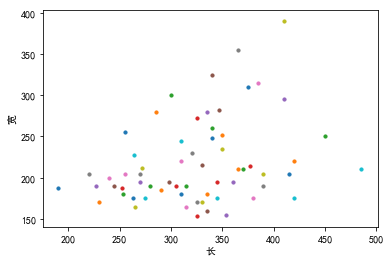

In [2]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
 
documentObject = pd.read_excel(r"C:/Users/YangTeng/Desktop/工作文档/包装问题/HCR/训练集.xlsx")
documentLst = documentObject.values.tolist()
print(documentLst)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(len(documentLst)):
    x = documentLst[i][0]
    y = documentLst[i][1]
    plt.scatter(x, y, s = 10)
    plt.xlabel('长')
    plt.ylabel('宽')
    save=documentLst
plt.show()

In [3]:
dataLength = len(documentLst)
#k为聚类中心点个数
k = 6
#iteraions为起始的迭代量
iterations = 0
#maxIteraions表示最大迭代次数
maxIteraions = 10000
#centre用来保存中心点的坐标,随机出k个样本数据作为中心点
centre = []
for i in range(k):
    centre.append([0]*2)
for i in range(k):
    tempIndex = random.randint(0, dataLength - 1)
    centre[i][0] = documentLst[tempIndex][0]
    centre[i][1] = documentLst[tempIndex][1]
print(centre)
#disRecord用于记录每一个样本点里中心点的距离
disRecord = []
for i in range(dataLength):
    disRecord.append([0]*6)
#定义distance函数计算两点间距离
def distance(samples, centres):
    return math.sqrt((samples[0] - centres[0])**2 + (samples[1] - centres[1])**2)
 
finalClusters = []
for i in range(k):
    finalClusters.append([])

[[325, 170], [280, 190], [264, 227], [377, 214], [285, 280], [310, 180]]


In [4]:
#进行k-means主体
while iterations < maxIteraions:
    #用于记录新的k个样本中心点的坐标
    new_centres = []
    for i in range(k):
        new_centres.append([0]*2)
    # cluster用于记录聚类结果[[], [], []]
    clusters = []
    for i in range(k):
        clusters.append([])
 
    for i in range(dataLength):
        for j in range(k):
            disRecord[i][j] = distance(documentLst[i], centre[j])
    #将某一个样本点的坐标添加至cluster列表中
    for i in range(dataLength):
        index = disRecord[i].index(min(disRecord[i]))
        clusters[index].append(i)
        new_centres[index][0] += documentLst[i][0]
        new_centres[index][1] += documentLst[i][1]
    #创建用于迭代的中心点数组
    temp_centre = []
    for i in range(k):
        temp_centre.append([0]*2)
    for i in range(k):
        temp_centre[i][0] = (new_centres[i][0])/len(clusters[i])
        temp_centre[i][1] = (new_centres[i][1])/len(clusters[i])
 
    if(temp_centre == centre):
        break;
    else:
        centre = temp_centre
        iterations += 1
        finalClusters = clusters
print("聚类中心为:", centre)
print("分类情况为:", finalClusters)

聚类中心为: [[337.93333333333334, 179.2], [276.45454545454544, 188.0], [237.8, 201.8], [413.0, 208.77777777777777], [380.8333333333333, 331.6666666666667], [326.0, 258.6666666666667]]
分类情况为: [[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 46, 51], [2, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18], [0, 1, 3, 4, 5, 6, 7, 16, 19, 20], [47, 48, 49, 50, 52, 53, 59, 61, 62], [54, 55, 56, 57, 58, 60], [21, 22, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]]


In [8]:
a=[]
b=[]
for i in range(0,6):
    m=len(finalClusters[i])
    b.append(i)
    for j in range(0,m):
        n=finalClusters[i][j]
        new=save[n]+b[-1:]
        a.append(new)
print(a)

[[325, 153, 107, 0], [354, 155, 52, 0], [335, 160, 125, 0], [315, 165, 65, 0], [325, 170, 60, 0], [330, 170, 95, 0], [345, 175, 100, 0], [310, 180, 100, 0], [335, 180, 160, 0], [315, 190, 185, 0], [345, 195, 60, 0], [360, 195, 100, 0], [330, 215, 85, 0], [380, 175, 95, 0], [365, 210, 80, 0], [253, 180, 92, 1], [265, 165, 65, 1], [275, 175, 64, 1], [263, 176, 54, 1], [290, 185, 66, 1], [280, 190, 65, 1], [305, 190, 70, 1], [270, 195, 55, 1], [298, 195, 52, 1], [270, 205, 55, 1], [272, 212, 85, 1], [190, 188, 65, 2], [230, 170, 115, 2], [252, 188, 129, 2], [227, 190, 66, 2], [245, 190, 66, 2], [240, 200, 55, 2], [220, 205, 53, 2], [255, 205, 68, 2], [264, 227, 57, 2], [255, 255, 80, 2], [390, 190, 125, 3], [390, 205, 150, 3], [420, 175, 95, 3], [415, 205, 105, 3], [370, 210, 105, 3], [377, 214, 84, 3], [485, 210, 90, 3], [420, 220, 170, 3], [450, 250, 56, 3], [410, 295, 200, 4], [340, 325, 230, 4], [385, 315, 300, 4], [365, 355, 325, 4], [410, 390, 280, 4], [375, 310, 85, 4], [285, 280, 

In [12]:
#####导入
column_names = ['长', '宽', '高','组合']
df = pd.DataFrame(a,columns=column_names)
df.to_excel('C:/Users/YangTeng/Desktop/工作文档/包装问题/HCR/训练结果.xlsx', sheet_name='分类组合', index=False)